## Import Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Load Dataset

In [2]:
df=pd.read_csv('hotel_bookings_data.csv')

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,3,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,4,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0,No Deposit,NaN,NaN,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,0,No Deposit,304.0,NaN,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,No Deposit,240.0,NaN,0,Personal,98.0,0,1,Check-Out


## Exploratory Data Analysis

### Descriptive Analysis

1. Download file "Dataset"

2. Mengatasi data null (Hint: Perhatikan jumlah data null dan tipe dari setiap kolom, untuk memilih metode yang tepat.)

3. Mengganti value yang tidak sesuai (Hint: Perhatikan kolom "meal")

4. Membuang data yang tidak diperlukan (Hint: Perhatikan total jumlah tamu untuk setiap pemesanan)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#### Check Missing Values

In [5]:
# view number of missing values
null_cols = df.columns[df.isnull().any()]
df_null = df[null_cols].isnull().sum().to_frame().reset_index()
df_null.columns = ['Columns', 'Total']
df_null['Percentage'] = round(df_null['Total']/len(df) * 100, 3)
df_null

,Columns,Total,Percentage
0,children,4,0.003
1,city,488,0.409
2,agent,16340,13.686
3,company,112593,94.307


In [6]:
df.duplicated().sum()

33261

In [7]:
nums = df.select_dtypes(exclude='object').columns.tolist()
cats = df.select_dtypes(include='object').columns.tolist()

In [8]:
print(f'Number of Numerical Columns is {len(nums)}')
print(f'Number of Categorical Columns is {len(cats)}')

Number of Numerical Columns is 20
Number of Categorical Columns is 9


In [9]:
df[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2018.156554,0.707476,2017.00,2018.00,2018.000,2019.0,2019.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_weekdays_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [10]:
df[cats].describe().T

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
arrival_date_month,119390,12,October,13877
meal,119390,5,Breakfast,92310
city,118902,177,Kota Denpasar,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
deposit_type,119390,3,No Deposit,104641
customer_type,119390,4,Personal,89613
reservation_status,119390,3,Check-Out,75166


In [11]:
for col in cats:
    print(f'Jumlah nilai unik dari kolom {col} ada {df[col].nunique()}:')
    print(df[col].unique().tolist())
    print('\n')

Jumlah nilai unik dari kolom hotel ada 2:
['Resort Hotel', 'City Hotel']


Jumlah nilai unik dari kolom arrival_date_month ada 12:
['September', 'October', 'November', 'December', 'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August']


Jumlah nilai unik dari kolom meal ada 5:
['Breakfast', 'Full Board', 'Dinner', 'No Meal', 'Undefined']


Jumlah nilai unik dari kolom city ada 177:
['Kota Denpasar', 'Kabupaten Bangka', 'Kabupaten Sleman', 'Kota Batu', 'Kota Malang', 'Kota Yogyakarta', nan, 'Kabupaten Tangerang', 'Kota Semarang', 'Kota Serang', 'Kota Tangerang', 'Kota Bogor', 'Kabupaten Bandung', 'Kabupaten Magelang', 'Kabupaten Sumedang', 'Kota Jakarta Timur', 'Kabupaten Purwakarta', 'Kabupaten Kepulauan Seribu', 'Kabupaten Belitung', 'Kota Jakarta Pusat', 'Kota Jakarta Selatan', 'Kota Surabaya', 'Kota Jakarta Utara', 'Kota Gorontalo', 'Kota Jambi', 'Kota Jakarta Barat', 'Kota Bengkulu', 'Kabupaten Bandung Barat', 'Kabupaten Bekasi', 'Kabupaten Bogor', 'Kabupaten Cia

## 1. Data Preprocessing

### Handling Missing Value

In [12]:
df['children'].fillna(0, inplace=True)
df['city'].fillna('Undefined', inplace=True)
df['agent'].fillna(df['agent'].median(), inplace=True)
df.drop('company', axis=1, inplace=True)

### Handling Duplicated Data

In [13]:
df.drop_duplicates(inplace=True)

### Handling Inconsistent Data

In [14]:
# handling and filtering inconsistent data
df = df[df['adr'] >= 0]
df['meal'].replace('Undefined', 'No Meal', inplace=True)
print(df.shape)

(86117, 28)


In [15]:
df['total_guests'] = df['adults'] + df['children'] + df['babies']
print('Data with 0 guest: {0} out of {1} all data'.format(df[df['total_guests'] == 0].shape[0], df.shape[0]))

Data with 0 guest: 165 out of 86117 all data


In [16]:
df['stay_duration'] = df['stays_in_weekend_nights'] + df['stays_in_weekdays_nights']
print('Data with 0 night: {0} out of {1} all data'.format(df[df['stay_duration'] == 0].shape[0], df.shape[0]))

Data with 0 night: 645 out of 86117 all data


In [17]:
df_clean = df[(df['total_guests'] > 0) & (df['stay_duration'] > 0)].copy()

##  Data Visualization

## 2. Monthly Hotel Bookings Analysis

1. Buatlah tabel agregat yang menunjukan perbandingan jumlah pemesanan hotel setiap bulannya berdasarkan jenis hotel 
(Hint: Perhatikan data tahun kedatangan)

2. Lakukan normalisasi data (Hint: Perhatikan data bulan September dan Oktober)

3. Urutkan data berdasarkan bulan (Hint: Perhatikan penulisan nama bulan untuk mempermudah visualisasi)

4. Buatlah plot yang dapat menunjukan perubahan kenaikan maupun penurunan dari jumlah pemesanan hotel setiap bulannya berdasarkan jenis hotel (Hint: Perhatikan jenis plot yang digunakan)

5. Tuliskan interpretasi terhadap hasil plot pada langkah sebelumnya (Hint: Perhatikan hari libur di Indonesia)

In [18]:
df1=df_clean.copy()

In [19]:
df1_groupby = df1.groupby(['hotel','arrival_date_month'])['arrival_date_year'].agg(['nunique','count']).reset_index()
df1_groupby.columns = ['hotel_type','arrival_month','unique_year','total_booking']
df1_groupby

,hotel_type,arrival_month,unique_year,total_booking
0,City Hotel,April,2,3514
1,City Hotel,August,2,4908
2,City Hotel,December,2,4009
3,City Hotel,February,2,2952
4,City Hotel,January,2,2849
5,City Hotel,July,2,5320
6,City Hotel,June,2,5017
7,City Hotel,March,2,2674
8,City Hotel,May,2,4777
9,City Hotel,November,2,4039


In [20]:
# Normalization 
df1_groupby['Average_Booking'] = round(df1_groupby['total_booking']/df1_groupby['unique_year'])
df1_groupby

,hotel_type,arrival_month,unique_year,total_booking,Average_Booking
0,City Hotel,April,2,3514,1757.0
1,City Hotel,August,2,4908,2454.0
2,City Hotel,December,2,4009,2004.0
3,City Hotel,February,2,2952,1476.0
4,City Hotel,January,2,2849,1424.0
5,City Hotel,July,2,5320,2660.0
6,City Hotel,June,2,5017,2508.0
7,City Hotel,March,2,2674,1337.0
8,City Hotel,May,2,4777,2388.0
9,City Hotel,November,2,4039,2020.0


In [21]:
ordered_months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df1_groupby['month'] = df1_groupby['arrival_month'].str[:3]
df1_groupby['month'] = pd.Categorical(df1_groupby['month'], categories=ordered_months, ordered=True)

df1_groupby

,hotel_type,arrival_month,unique_year,total_booking,Average_Booking,month
0,City Hotel,April,2,3514,1757.0,Apr
1,City Hotel,August,2,4908,2454.0,Aug
2,City Hotel,December,2,4009,2004.0,Dec
3,City Hotel,February,2,2952,1476.0,Feb
4,City Hotel,January,2,2849,1424.0,Jan
5,City Hotel,July,2,5320,2660.0,Jul
6,City Hotel,June,2,5017,2508.0,Jun
7,City Hotel,March,2,2674,1337.0,Mar
8,City Hotel,May,2,4777,2388.0,May
9,City Hotel,November,2,4039,2020.0,Nov


Text(4.7, 4400, 'Holiday\nSeason')

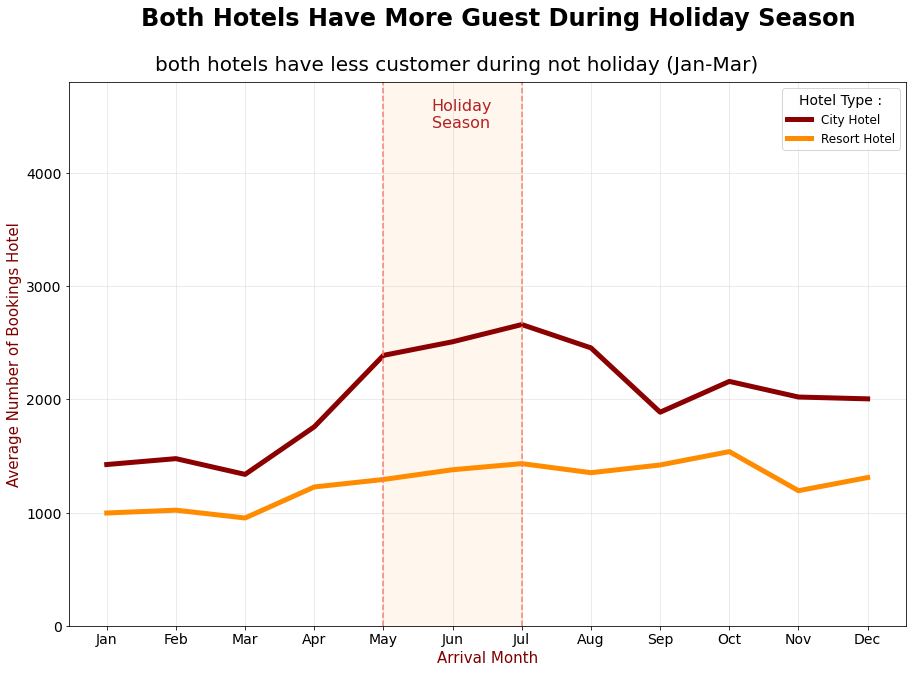

In [22]:
plt.figure(figsize=(15,10))
sns.lineplot(x='month', y='Average_Booking', hue='hotel_type',
             size='hotel_type', sizes=(5, 5), data=df1_groupby, palette= ['darkred', 'darkorange'])

plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(alpha=0.3)
plt.legend(title='Hotel Type :', title_fontsize=14, prop={'size':12}, fontsize='x-large')

plt.xlabel('Arrival Month', fontsize=15, color='maroon')
plt.ylabel('Average Number of Bookings Hotel', fontsize=15, color='maroon')
plt.ylim(0,4800)

plt.text(x=0.5, y=5300, s='Both Hotels Have More Guest During Holiday Season', fontsize=24, fontweight='bold')
plt.text(x=0.7, y=4900, s='both hotels have less customer during not holiday (Jan-Mar)', fontsize=20)

plt.axvline(4, ls='--', color='salmon')
plt.axvline(6, ls='--', color='salmon')
plt.stackplot(np.arange(4,7,1),[[4800]], color='bisque', alpha=0.3)
plt.text(x=4.7, y=4400, s='Holiday\nSeason', fontsize=16, color='firebrick')

## 3. Impact Analysis of Stay Duration on Hotel Bookings Cancellation Rate

1. Buatlah kolom baru yang berisi total durasi menginap. (Hint: Perhatikan kolom-kolom yang memuat informasi tentang durasi menginap)

2. Kelompokkan nilai-nilai dari kolom baru pada langkah sebelumnya supaya lebih signifikan (Hint: Perhatikan persebaran datanya)

3. Buatlah tabel agregat yang menunjukan perbandingan jumlah pemesanan hotel yang dibatalkan terhadap durasi menginap untuk 
setiap jenis hotel (Hint: Perhatikan proporsi dari pemesanan yang dibatalkan)

4. Buatlah plot yang dapat menunjukan rasio pembatalan pesanan terhadap durasi menginap untuk setiap tipe hotel 
(Hint: Perhatikan jenis plot yang digunakan)

5. Tuliskan interpretasi terhadap hasil plot pada langkah sebelumnya (Hint: Perhatikan pengaruh dari durasi menginap terhadap 
tingkat pembatalan pemesanan hotel)

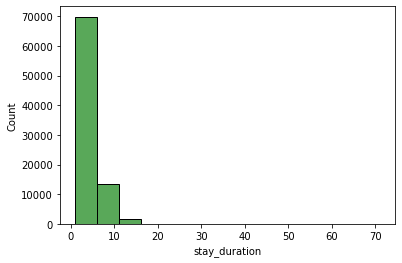

In [23]:
sns.histplot(data=df1, x='stay_duration', binwidth=5, color = 'forestgreen');

In [24]:
df1['total_nights'] = np.where(df1['stay_duration'] > 21, 21, 
                            np.where(df1['stay_duration'] > 14, 15, df1['stay_duration']))

In [25]:
df1['total_nights'].unique()

array([ 1,  2,  3,  4,  5,  6,  7, 14, 15, 10, 11,  8,  9, 13, 12, 21],
      dtype=int64)

In [26]:
df1_ = df1.groupby(['hotel','is_canceled','total_nights']).agg({'arrival_date_month' : 'count'}).reset_index()
df1_

,hotel,is_canceled,total_nights,arrival_date_month
0,City Hotel,0,1,7839
1,City Hotel,0,2,7374
2,City Hotel,0,3,9136
3,City Hotel,0,4,6440
4,City Hotel,0,5,2887
...,...,...,...,...
59,Resort Hotel,1,12,49
60,Resort Hotel,1,13,24
61,Resort Hotel,1,14,159
62,Resort Hotel,1,15,47


In [27]:
df1_pivot = df1_.pivot_table(index=['hotel', 'total_nights'],
                                  columns=['is_canceled'],
                                  values=['arrival_date_month']).reset_index()
df1_pivot.columns = ['hotel','total_nights','not_canceled','canceled']
df1_pivot.head()

,hotel,total_nights,not_canceled,canceled
0,City Hotel,1,7839,2259
1,City Hotel,2,7374,3133
2,City Hotel,3,9136,4182
3,City Hotel,4,6440,3059
4,City Hotel,5,2887,1257


In [28]:
df1_pivot['percentage_canceled'] = round(df1_pivot['canceled']*100.0/(df1_pivot['not_canceled']+df1_pivot['canceled']),2)
df1_pivot.head()

,hotel,total_nights,not_canceled,canceled,percentage_canceled
0,City Hotel,1,7839,2259,22.37
1,City Hotel,2,7374,3133,29.82
2,City Hotel,3,9136,4182,31.40
3,City Hotel,4,6440,3059,32.20
4,City Hotel,5,2887,1257,30.33


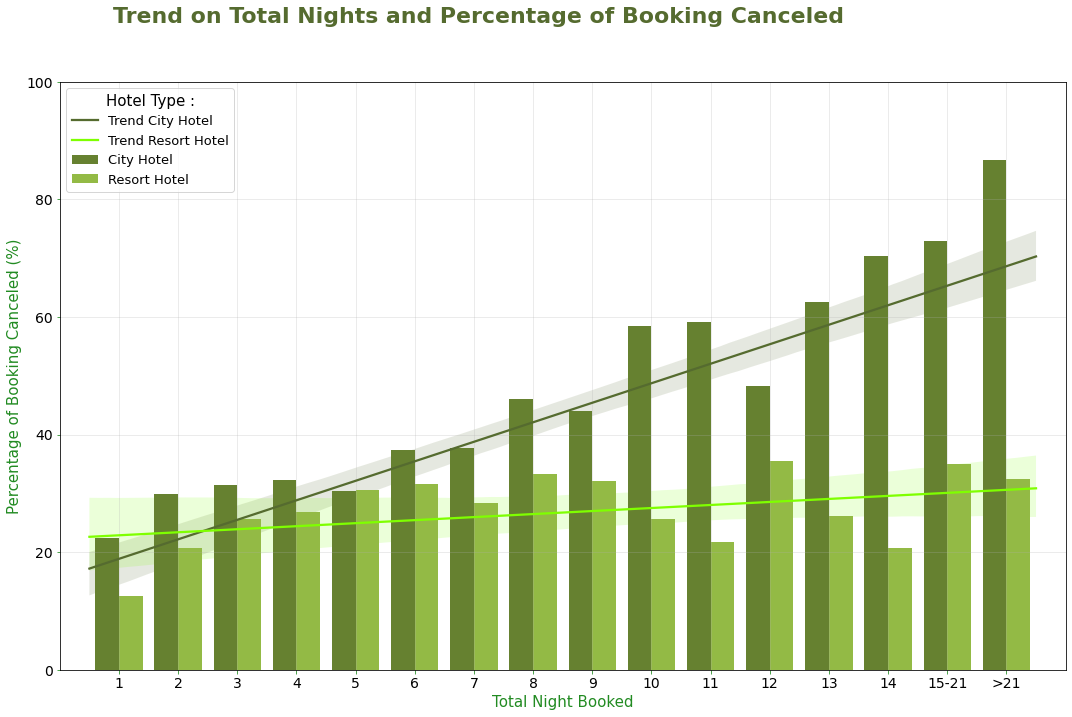

In [29]:
plt.figure(figsize=(15,10))
sns.barplot(x='total_nights', y='percentage_canceled', hue='hotel', data=df1_pivot, palette= ['olivedrab', 'yellowgreen'])
sns.regplot(x='total_nights', y='percentage_canceled', data=df1_pivot[df1_pivot['hotel'] == 'City Hotel'], scatter=False, label='Trend City Hotel',color= 'darkolivegreen', truncate=False)
sns.regplot(x='total_nights', y='percentage_canceled', data=df1_pivot[df1_pivot['hotel'] == 'Resort Hotel'], scatter=False, label='Trend Resort Hotel', color='chartreuse', truncate=False)

plt.tick_params(axis='both', which='major', labelsize=14, color ='forestgreen')
plt.grid(alpha=0.3)
plt.legend(title='Hotel Type :', title_fontsize=15, prop={'size':13})

plt.xticks(range(0,16,1), labels=[str(x) for x in range(1,15,1)]+['15-21','>21'])
plt.xlabel('Total Night Booked', fontsize=15, color ='forestgreen')
plt.ylabel('Percentage of Booking Canceled (%)', fontsize=15, color ='forestgreen')
plt.ylim(0, 100)
plt.xlim(-1, 16)

plt.text(x=-0.1, y=110, s='Trend on Total Nights and Percentage of Booking Canceled', 
         fontsize=22, fontweight='bold', color='darkolivegreen')

plt.tight_layout()

## 4. Impact Analysis of Lead Time on Hotel Bookings Cancellation Rate

1. Buatlah kolom baru yang berisi kategorisasi dari kolom jarak waktu pemesanan 
(Hint: Perhatikan interval dalam membuat kategorisasi)

2. Buatlah tabel agregat yang menunjukan perbandingan jumlah pemesanan hotel yang dibatalkan terhadap jarak waktu pemesanan untuk 
setiap jenis hotel (Hint: Perhatikan proporsi dari pemesanan yang dibatalkan)

3. Buatlah plot yang dapat menunjukan rasio pembatalan pesanan terhadap jarak waktu pemesanan untuk setiap tipe hotel 
(Hint: Perhatikan jenis plot yang digunakan)

4. Tuliskan interpretasi terhadap hasil plot pada langkah sebelumnya (Hint: Perhatikan pengaruh interval waktu)

In [30]:
df2 = df_clean.copy()

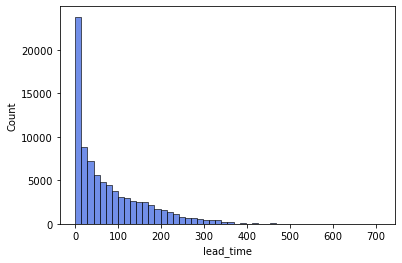

In [31]:
sns.histplot(data=df2, x='lead_time', bins=50, color = 'royalblue');

In [32]:
print('maximum value of lead time :',df2['lead_time'].max())

maximum value of lead time : 709


In [33]:
df2['lead_times'] = np.where(df2['lead_time'] > 400, 401, df2['lead_time'])
df2['lead_times'].value_counts()

0      5629
1      3129
2      1890
3      1683
4      1537
       ... 
400       1
370       1
387       1
389       1
380       1
Name: lead_times, Length: 400, dtype: int64

In [34]:
bins = list(np.arange(0,max(df2['lead_times'])+30, 30))
print(bins)

[0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330, 360, 390, 420]


In [35]:
labels = ["{0}-{1}".format(str(bins[x]), str(bins[x+1])) for x in range(len(bins[:-1]))]
print(labels)

['0-30', '30-60', '60-90', '90-120', '120-150', '150-180', '180-210', '210-240', '240-270', '270-300', '300-330', '330-360', '360-390', '390-420']


In [36]:
df2['lead_time_group'] = pd.cut(df2['lead_times'],bins=bins, include_lowest=True, labels=labels)
df2['lead_time_group'].value_counts()

0-30       33799
30-60      13091
60-90       9194
90-120      7094
120-150     5641
150-180     5184
180-210     3658
210-240     2625
240-270     1689
270-300     1218
300-330      956
330-360      602
390-420      376
360-390      239
Name: lead_time_group, dtype: int64

In [37]:
df2_ = df2.groupby(['hotel','lead_time_group','is_canceled']).agg({'lead_times' : 'count'}).reset_index()
df2_.head()

,hotel,lead_time_group,is_canceled,lead_times
0,City Hotel,0-30,0,16022
1,City Hotel,0-30,1,3927
2,City Hotel,30-60,0,5818
3,City Hotel,30-60,1,2884
4,City Hotel,60-90,0,4069


In [38]:
df2_pivot = df2_.pivot_table(index=['hotel','lead_time_group'],
                                  columns=['is_canceled'],
                                  values=['lead_times']).reset_index()
df2_pivot.columns = ['hotel','lead_time_group','not_canceled','canceled']
df2_pivot.head()

,hotel,lead_time_group,not_canceled,canceled
0,City Hotel,0-30,16022,3927
1,City Hotel,30-60,5818,2884
2,City Hotel,60-90,4069,2088
3,City Hotel,90-120,3031,1684
4,City Hotel,120-150,2288,1312


In [39]:
df2_pivot['percentage_canceled'] = round(df2_pivot['canceled']*100.0/(df2_pivot['not_canceled']+df2_pivot['canceled']),2)
df2_pivot.head()

,hotel,lead_time_group,not_canceled,canceled,percentage_canceled
0,City Hotel,0-30,16022,3927,19.69
1,City Hotel,30-60,5818,2884,33.14
2,City Hotel,60-90,4069,2088,33.91
3,City Hotel,90-120,3031,1684,35.72
4,City Hotel,120-150,2288,1312,36.44


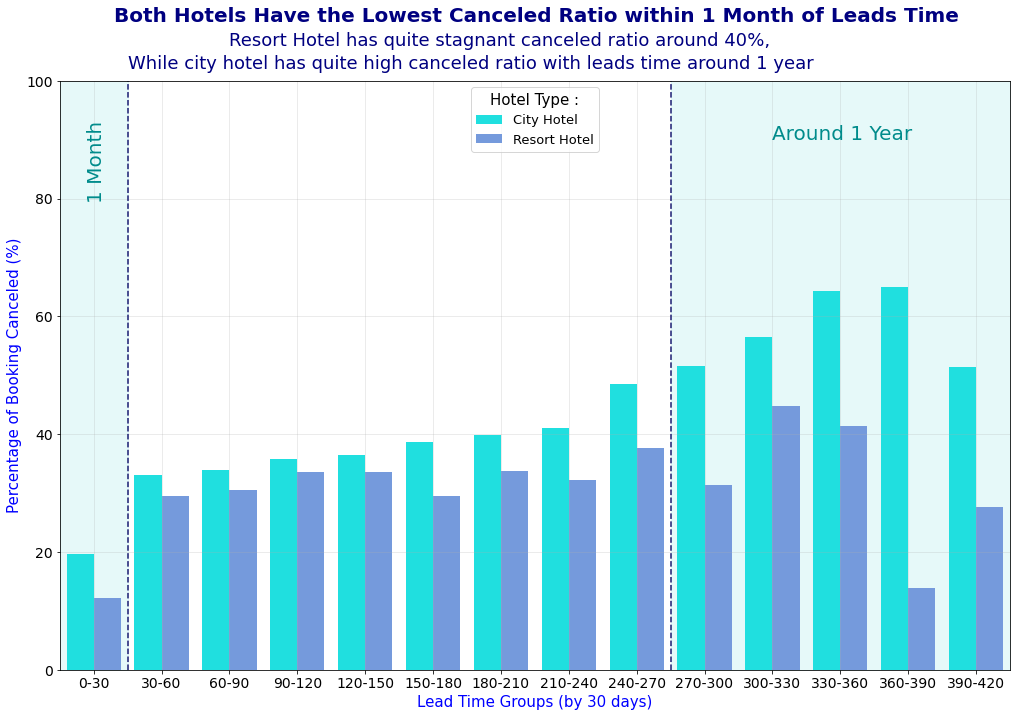

In [40]:
plt.figure(figsize=(15,10))
sns.barplot(x='lead_time_group', y='percentage_canceled', hue='hotel', data=df2_pivot, palette= ['cyan', 'cornflowerblue'])

plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(alpha=0.3)
plt.legend(title='Hotel Type :', title_fontsize=15, prop={'size':13}, loc='upper center')

plt.xlabel('Lead Time Groups (by 30 days)', fontsize=15, color='blue')
plt.ylabel('Percentage of Booking Canceled (%)', fontsize=15, color='blue')
plt.ylim(0,100)
plt.xlim(-0.5,13.5)

plt.axvline(0.5, ls='--', color='midnightblue')
plt.stackplot(np.arange(-0.5,1.5,1),[[100]], color='paleturquoise', alpha=0.3)
plt.text(x=-0.1, y=80, s='1 Month', fontsize=20, color='darkcyan', rotation=90)

plt.axvline(8.5, ls='--', color='midnightblue')
plt.stackplot(np.arange(8.5,14.5,1),[[100]], color='paleturquoise', alpha=0.3)
plt.text(x=10, y=90, s='Around 1 Year', fontsize=20, color='darkcyan')

plt.text(x=0.3, y=110, s='Both Hotels Have the Lowest Canceled Ratio within 1 Month of Leads Time', 
         fontsize=20, fontweight='bold', color='navy')
plt.text(x=2.0, y=106, s='Resort Hotel has quite stagnant canceled ratio around 40%,', 
         fontsize=18, color='navy')
plt.text(x=0.5, y=102, s='While city hotel has quite high canceled ratio with leads time around 1 year', 
         fontsize=18, color='navy')

plt.tight_layout()